<h2> Exploratory analysis for a choice of hyperparameters in my Cancer classifier model  </h2>
<p> In this file weigths are initilized by Xavier normal initializer </p>

In [1]:
import numpy as np
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Conv2D, BatchNormalization, Dense, Dropout, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
def load_dataset():

    f = h5py.File('Test_Set.h5', 'r')
    X_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Test_Label.h5', 'r')
    Y_test = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Set.h5', 'r')
    X = np.array(f['array'][:]) # your train set features
    f.close()
    
    f = h5py.File('Train_Label.h5', 'r')
    Y = np.array(f['array'][:]) # your train set features
    f.close()
    
    return X, Y, X_test, Y_test

In [3]:
# --------- Load the data ------------

X, Y, X_test, Y_test = load_dataset()

print('Total number of examples to train ', Y.shape[0])
print('Number of negative examples', len(np.where (Y == 1)[0]))

Total number of examples to train  30000
Number of negative examples 15000


<h2> Define the model </h2>

In [4]:
def Cancer_clasifier(input_shapes):
    
    X_input = Input(input_shapes)
    
    XX = Conv2D(8, kernel_size = (2,2), strides=(1, 1), padding = 'same', 
                kernel_initializer='GlorotNormal')(X_input)       
    XX = BatchNormalization(axis = -1)(XX)
    XX = Activation('relu')(XX)
    XX = MaxPooling2D(2,2)(XX)
 

    for no_filters in [16]:
        XX = Conv2D(no_filters, kernel_size = (4,4), strides=(1, 1), padding = 'same')(XX)
        XX = BatchNormalization(axis = -1)(XX)
        XX = Activation('relu')(XX)
        XX = MaxPooling2D(2,2)(XX)

    
    # --- Output Layer
    XX = Flatten()(XX)
    
    XX = Dense(1, activation='sigmoid')(XX)
    
    model = Model(inputs = X_input, outputs = XX, name='Cancer_clasifier')
              
    return model

<h2> Train the model </h2>

In [5]:
my_cancer_model = Cancer_clasifier(X.shape[1:])

optimizing_function = Adam(0.0001, beta_1=0.9, beta_2 = 0.999)

my_cancer_model.compile(optimizer = optimizing_function, loss='binary_crossentropy', metrics=['accuracy'])

history = my_cancer_model.fit(x = X, y = Y, validation_data=(X_test,Y_test), epochs = 20, batch_size = 100)

Epoch 1/20
300/300 [==============================] - 102s 340ms/step - loss: 0.4717 - accuracy: 0.7822 - val_loss: 0.6387 - val_accuracy: 0.6494
Epoch 2/20
300/300 [==============================] - 91s 302ms/step - loss: 0.4019 - accuracy: 0.8298 - val_loss: 0.4448 - val_accuracy: 0.7914
Epoch 3/20
300/300 [==============================] - 89s 297ms/step - loss: 0.3824 - accuracy: 0.8379 - val_loss: 0.4431 - val_accuracy: 0.7970
Epoch 4/20
300/300 [==============================] - 91s 303ms/step - loss: 0.3712 - accuracy: 0.8425 - val_loss: 0.3958 - val_accuracy: 0.8249
Epoch 5/20
300/300 [==============================] - 89s 297ms/step - loss: 0.3608 - accuracy: 0.8484 - val_loss: 0.4238 - val_accuracy: 0.8103
Epoch 6/20
300/300 [==============================] - 94s 313ms/step - loss: 0.3518 - accuracy: 0.8526 - val_loss: 0.4689 - val_accuracy: 0.7884
Epoch 7/20
300/300 [==============================] - 88s 293ms/step - loss: 0.3435 - accuracy: 0.8568 - val_loss: 0.4597 - val_a

Evaluate model with confussion matrix

In [8]:
Y_pred = my_cancer_model.predict(X_test)
Y_pred[Y_pred < 0.5] = 0
Y_pred[Y_pred >= 0.5] = 1
cm = confusion_matrix(Y_test, Y_pred)
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total

print('Confusion matrix is: \n', cm)

print('summary of the model')
my_cancer_model.summary()

Confusion matrix is: 
 [[9840  160]
 [5144 4856]]
summary of the model
Model: "Cancer_clasifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 8)         104       
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 50, 50, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 16)        2064      
_____________________________________________

<h2> Plot the loss </h2>

Text(0.5, 1.0, 'Batch = 100, LR_Adam = 0.0001, Model 1 trained on 15,000 negative and 15,000 positive examples')

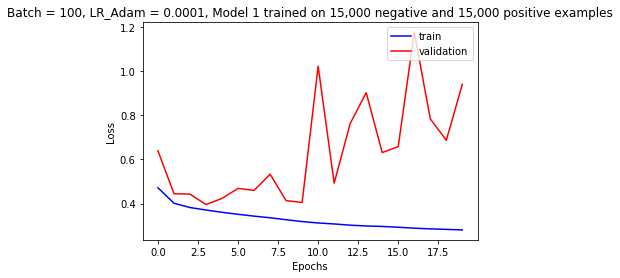

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch = 100, LR_Adam = 0.0001, Model 1 trained on 15,000 negative and 15,000 positive examples')

# -- If you want to save the image uncomment this line
#plt.savefig('Model1_Exploratory.png')

As we see from the plot, this model will benefit from early stopping.

In [ ]:
Optionaly save the model:

In [ ]:
'''
# serialize model to JSON
model_json = my_cancer_model.to_json()
with open("my_cancer_model_10May_50epochs.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
my_cancer_model.save_weights("my_cancer_model_10May_50epochs.h5")
'''